In [232]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
df = pd.read_csv("data/Mental_Health_and_Social_Media_Balance_Dataset.csv")
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


In [234]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
None
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   3

In [235]:
# Create binary target
df["Stress_Binary"] = (df["Stress_Level(1-10)"] >= 6).astype(int)
df = df.drop("Stress_Level(1-10)", axis=1)

In [236]:
# 1. Handling Categorical Variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Social_Media_Platform'], dtype=int)

In [237]:
# 2. Checking for Missing Values
missing_values = df_encoded.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
User_ID                              0
Age                                  0
Daily_Screen_Time(hrs)               0
Sleep_Quality(1-10)                  0
Days_Without_Social_Media            0
Exercise_Frequency(week)             0
Happiness_Index(1-10)                0
Stress_Binary                        0
Gender_Female                        0
Gender_Male                          0
Gender_Other                         0
Social_Media_Platform_Facebook       0
Social_Media_Platform_Instagram      0
Social_Media_Platform_LinkedIn       0
Social_Media_Platform_TikTok         0
Social_Media_Platform_X (Twitter)    0
Social_Media_Platform_YouTube        0
dtype: int64


In [238]:
# 3. Scaling Continuous Variables
# Identify continuous variables for scaling
continuous_columns = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Days_Without_Social_Media', 
                      'Exercise_Frequency(week)', 'Happiness_Index(1-10)']
Q1 = df_encoded[continuous_columns].quantile(0.25)
Q3 = df_encoded[continuous_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR
outliers_iqr = (df_encoded[continuous_columns] < (Q1 - 1.5 * IQR)) | (df_encoded[continuous_columns] > (Q3 + 1.5 * IQR))
outlier_rows_iqr = df_encoded[outliers_iqr.any(axis=1)]
print("Outlier rows based on IQR:")
print(outlier_rows_iqr)

# Removing outliers using IQR
df_no_outliers_iqr = df_encoded[~outliers_iqr.any(axis=1)]
df_no_outliers_iqr[continuous_columns] = df_no_outliers_iqr[continuous_columns].astype('float64')

df_no_outliers_iqr

Outlier rows based on IQR:
    User_ID  Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
39     U040   23                     1.0                  9.0   
248    U249   46                    10.8                  5.0   
325    U326   27                    10.8                  2.0   
489    U490   47                     4.9                  7.0   

     Days_Without_Social_Media  Exercise_Frequency(week)  \
39                         5.0                       7.0   
248                        2.0                       3.0   
325                        3.0                       2.0   
489                        1.0                       7.0   

     Happiness_Index(1-10)  Stress_Binary  Gender_Female  Gender_Male  \
39                    10.0              0              1            0   
248                    4.0              1              1            0   
325                    5.0              1              0            1   
489                   10.0              1             

C:\Users\rajra\AppData\Local\Temp\ipykernel_14684\3702309958.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr[continuous_columns] = df_no_outliers_iqr[continuous_columns].astype('float64')


,User_ID,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Stress_Binary,Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,U001,44.0,3.1,7.0,2.0,5.0,10.0,1,0,1,0,1,0,0,0,0,0
1,U002,30.0,5.1,7.0,5.0,3.0,10.0,1,0,0,1,0,0,1,0,0,0
2,U003,23.0,7.4,6.0,1.0,3.0,6.0,1,0,0,1,0,0,0,0,0,1
3,U004,36.0,5.7,7.0,1.0,1.0,8.0,1,1,0,0,0,0,0,1,0,0
4,U005,34.0,7.0,4.0,5.0,1.0,8.0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,U496,23.0,6.9,5.0,4.0,2.0,10.0,1,0,1,0,0,0,0,0,1,0
496,U497,43.0,5.6,7.0,5.0,2.0,9.0,1,1,0,0,1,0,0,0,0,0
497,U498,41.0,7.7,5.0,2.0,2.0,8.0,1,0,1,0,0,0,1,0,0,0
498,U499,23.0,4.2,9.0,0.0,2.0,9.0,1,0,1,0,1,0,0,0,0,0


In [239]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling
df_no_outliers_iqr.loc[:, continuous_columns] = scaler.fit_transform(df_no_outliers_iqr[continuous_columns])
df_no_outliers_iqr


,User_ID,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Stress_Binary,Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,U001,1.110090,-1.427055,0.456182,-0.611571,1.832943,1.073037,1,0,1,0,1,0,0,0,0,0
1,U002,-0.298363,-0.247258,0.456182,1.001936,0.406841,1.073037,1,0,0,1,0,0,1,0,0,0
2,U003,-1.002590,1.109509,-0.203486,-1.149407,0.406841,-1.584773,1,0,0,1,0,0,0,0,0,1
3,U004,0.305259,0.106681,0.456182,-1.149407,-1.019260,-0.255868,1,1,0,0,0,0,0,1,0,0
4,U005,0.104052,0.873549,-1.522823,1.001936,-1.019260,-0.255868,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,U496,-1.002590,0.814560,-0.863155,0.464100,-0.306209,1.073037,1,0,1,0,0,0,0,0,1,0
496,U497,1.009486,0.047691,0.456182,1.001936,-0.306209,0.408585,1,1,0,0,1,0,0,0,0,0
497,U498,0.808278,1.286478,-0.863155,-0.611571,-0.306209,-0.255868,1,0,1,0,0,0,1,0,0,0
498,U499,-1.002590,-0.778167,1.775519,-1.687243,-0.306209,0.408585,1,0,1,0,1,0,0,0,0,0


In [240]:
summary_stats = df_no_outliers_iqr.describe()
print("Summary statistics:")
print(summary_stats)

Summary statistics:
                Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
count  4.960000e+02            4.960000e+02         4.960000e+02   
mean  -2.865092e-16           -2.113005e-16        -8.684809e-17   
std    1.001010e+00            1.001010e+00         1.001010e+00   
min   -1.706816e+00           -2.665842e+00        -2.842160e+00   
25%   -9.019860e-01           -7.191767e-01        -8.631548e-01   
50%    1.040519e-01            4.769139e-02        -2.034864e-01   
75%    8.082785e-01            6.965798e-01         4.561820e-01   
max    1.613109e+00            2.643245e+00         2.435187e+00   

       Days_Without_Social_Media  Exercise_Frequency(week)  \
count               4.960000e+02              4.960000e+02   
mean               -8.595275e-17              1.790682e-16   
std                 1.001010e+00              1.001010e+00   
min                -1.687243e+00             -1.732311e+00   
25%                -6.115712e-01             -1.019260e+0

In [241]:
df_modified = df_no_outliers_iqr.drop(columns=['User_ID'])
df_modified

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Stress_Binary,Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,1.110090,-1.427055,0.456182,-0.611571,1.832943,1.073037,1,0,1,0,1,0,0,0,0,0
1,-0.298363,-0.247258,0.456182,1.001936,0.406841,1.073037,1,0,0,1,0,0,1,0,0,0
2,-1.002590,1.109509,-0.203486,-1.149407,0.406841,-1.584773,1,0,0,1,0,0,0,0,0,1
3,0.305259,0.106681,0.456182,-1.149407,-1.019260,-0.255868,1,1,0,0,0,0,0,1,0,0
4,0.104052,0.873549,-1.522823,1.001936,-1.019260,-0.255868,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.002590,0.814560,-0.863155,0.464100,-0.306209,1.073037,1,0,1,0,0,0,0,0,1,0
496,1.009486,0.047691,0.456182,1.001936,-0.306209,0.408585,1,1,0,0,1,0,0,0,0,0
497,0.808278,1.286478,-0.863155,-0.611571,-0.306209,-0.255868,1,0,1,0,0,0,1,0,0,0
498,-1.002590,-0.778167,1.775519,-1.687243,-0.306209,0.408585,1,0,1,0,1,0,0,0,0,0


In [242]:
df_modified.columns
df_modified.to_csv("data/Digital_Stress_Classifier_preprocess.csv",index=False)

In [243]:
correlation_matrix = df_modified.corr()
correlation_matrix.sort_values(by=["Stress_Binary"],ascending=False,inplace=True)
correlation_matrix["Stress_Binary"]

Stress_Binary                        1.000000
Daily_Screen_Time(hrs)               0.570245
Social_Media_Platform_Instagram      0.068942
Social_Media_Platform_Facebook       0.026163
Gender_Female                        0.016791
Gender_Other                         0.010623
Age                                  0.010459
Exercise_Frequency(week)            -0.001103
Social_Media_Platform_YouTube       -0.002078
Social_Media_Platform_LinkedIn      -0.003765
Social_Media_Platform_TikTok        -0.004803
Gender_Male                         -0.021193
Days_Without_Social_Media           -0.025014
Social_Media_Platform_X (Twitter)   -0.078466
Sleep_Quality(1-10)                 -0.451658
Happiness_Index(1-10)               -0.536606
Name: Stress_Binary, dtype: float64

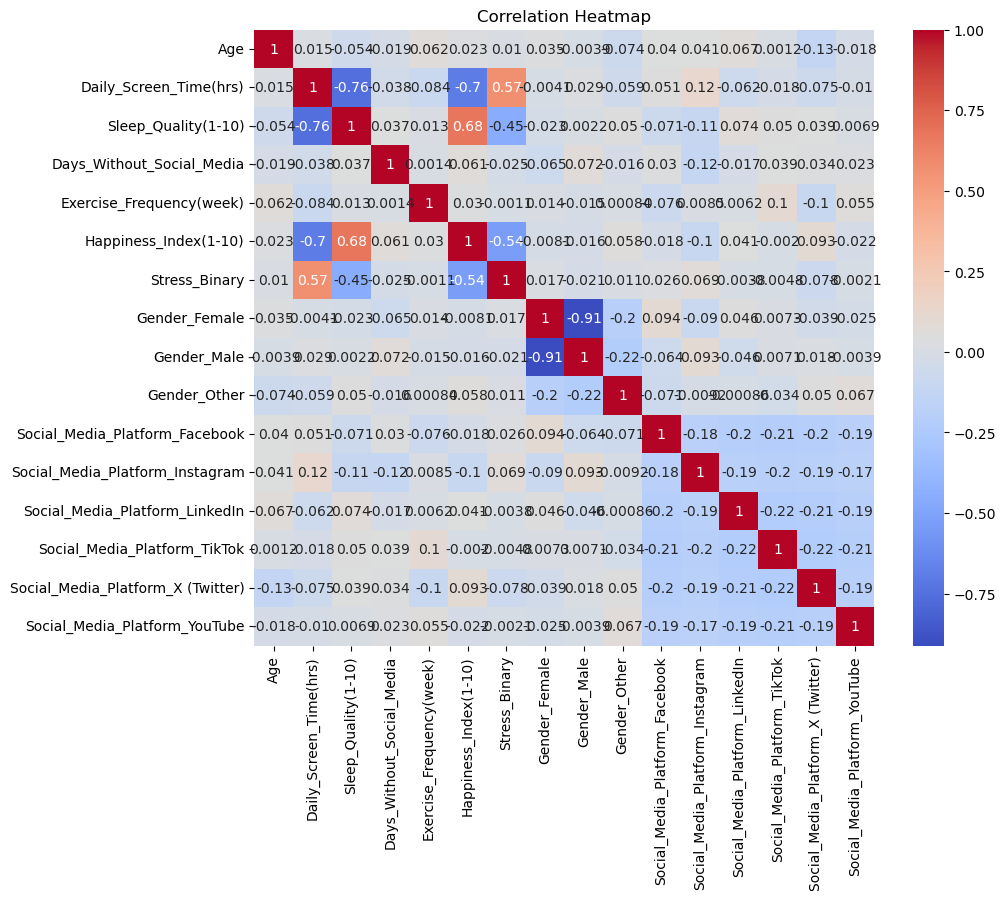

In [244]:
plt.figure(figsize=(10,8))
sns.heatmap(df_modified.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()